Installing Spotipy

In [6]:
%pip install spotipy
%pip install pandas
%pip install bs4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 9.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 7.2 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=bc86a1eaed5e33aa77a83ef2efee243116c7e5bc8bb5d3a85d685082d60562bd
  Stored in directory: /Users/huangyiqi/Library/Caches/pip/wheel

Import all the necessary packages

In [5]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import requests

#connect to the spotify api
cid ='e12d879922714e06928053174bb30fa5'
secret ='33d2758772574035ac4c88fa95422e86'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


ModuleNotFoundError: No module named 'pandas'

A function to get all the songs from an album using album sharing url

In [24]:
#insert the URI as a string into the function
def get_album_tracks(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

Get all the tracks

In [25]:
tracks_sos = get_album_tracks("https://open.spotify.com/album/1nrVofqDRs7cpWXJ49qTnP?si=GlPcHRnDRL-ugW16xdQDwQ")

a function that will take a dataframe of all the songs in the album we want to perform our analysis on (this is the output of the above function) and attach features such as danceability, energy, key, and loudness per track

In [26]:
#insert output dataframe from the get_album_tracks function
def get_track_info(df):
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    for i in df['uri']:
        for x in sp.audio_features(tracks=[i]):
            danceability.append(x['danceability'])
            energy.append(x['energy'])
            key.append(x['key'])
            loudness.append(x['loudness'])
            speechiness.append(x['speechiness'])
            acousticness.append(x['acousticness'])
            instrumentalness.append(x['instrumentalness'])
            liveness.append(x['liveness'])
            valence.append(x['valence'])
            tempo.append(x['tempo'])
            
    df2 = pd.DataFrame({
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'tempo':tempo})
    
    return df2


In [27]:
tracks_sos_wfeatures = get_track_info(tracks_sos)

In [28]:
def merge_frames(df1, df2):
    df3 = df1.merge(df2, left_index= True, right_index= True)
    return df3

sos = merge_frames(tracks_sos, tracks_sos_wfeatures)
print(sos)

                                     uri  \
0   spotify:track:6prribvZEc0z79BkGLuuhJ   
1   spotify:track:1Qrg8KqiBpW07V7PNxwwwL   
2   spotify:track:2KiLsNebHpP3Obhrj4wZWr   
3   spotify:track:3KRsOSYyt1NELhAhb3AFXu   
4   spotify:track:2hQo3aG0eeAnj3GSC0dfKL   
5   spotify:track:1k903tSQLMEyI25Zk7Uu9q   
6   spotify:track:4NqkE7kRUvMDEdcqD96EDO   
7   spotify:track:7aQi48ImHQsfni7tDlFQvL   
8   spotify:track:77G7Q90RXX3YTVXHw5Oox3   
9   spotify:track:4tNTlP9M5kN2TB8OK6PDqn   
10  spotify:track:6XguPmvQF7YCbCCiGaH3zd   
11  spotify:track:0GhV8OqZZHJ9ajvAo7PeQW   
12  spotify:track:21QoQJL82spGDTg7ezskWm   
13  spotify:track:0impvergaW8CuQS2OcEWMu   
14  spotify:track:1FmJMpOjxWkiv5u6L8pxXX   
15  spotify:track:7qecaub0Xvlw87waQYSfgf   
16  spotify:track:4Mteyd60tfstDuzfkGqXx1   
17  spotify:track:7A43EM6GnRnq0aWYRVzS4H   
18  spotify:track:4NLBrPnLcOgyoOUFmRsDbt   
19  spotify:track:6koKhrBBcExADvWuOgceNZ   
20  spotify:track:2EDuxTLWcKf4xitJnM9grN   
21  spotify:track:10sFUdHmJAChUw

In [59]:

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

#function to scrape lyrics from genius
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2, headers=headers)
    html = BeautifulSoup(page.text, 'html.parser')
    print(html.get_text())
    lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn")
    if lyrics1:
        lyrics = lyrics1.get_text()
    elif lyrics2:
        lyrics = lyrics2.get_text()
    elif lyrics1 == lyrics2 == None:
        lyrics = None
    return lyrics

#function to attach lyrics onto data frame
#artist_name should be inserted as a string
def lyrics_onto_frame(df1, artist_name):
    for i,x in enumerate(df1['track']):
        test = scrape_lyrics(artist_name, x)
        df1.loc[i, 'lyrics'] = test
    return df1

lyrics_onto_frame(sos, "SZA")








Genius
*{box-sizing:border-box}body{width:100%;margin:0;color:#fff;background:#000;font-family:Helvetica Neue,Arial,Helvetica,Geneva,sans-serif;font-size:20px;font-weight:700}a,a:active,a:focus{color:#3d85c6;text-decoration:none}a:hover{border-bottom:1px dotted}header{background-color:#ffff64;padding:10px;color:#000}header img{height:20px;display:block;margin:0 auto}main{max-width:860px;margin:0 auto}.text{text-align:center}.alert{margin:40px 20px}h1{font-size:7.5rem;text-transform:uppercase;font-weight:700;margin:0}@media screen and (max-width:420px){h1{font-size:3.5rem}}.distractions{margin:3rem auto 0;width:100%;max-width:700px}.iframe-container{width:100%;height:0;padding-top:56.25%;position:relative}.iframe-container iframe{max-width:100%;max-height:100%;position:absolute;top:0;left:0}
.cloudflare_content{margin-top:2rem}#recaptcha_widget{display:flex;justify-content:center}
!function(e,a){var t,n,i,l;a.__SV||((window.mixpanel=a)._i=[],a.init=function(e,t,n){function o(e,t){

,uri,track,duration_ms,explicit,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
0,spotify:track:6prribvZEc0z79BkGLuuhJ,SOS,117773,False,1,0.438,0.646,7,-7.504,0.3140,0.6870,0.000047,0.1050,0.591,78.748,NaN
1,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,153946,False,2,0.644,0.735,8,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,NaN
2,spotify:track:2KiLsNebHpP3Obhrj4wZWr,Seek & Destroy,203733,False,3,0.658,0.646,1,-5.402,0.0824,0.4030,0.226000,0.2050,0.395,152.036,NaN
3,spotify:track:3KRsOSYyt1NELhAhb3AFXu,Low,181080,False,4,0.721,0.592,0,-7.218,0.0573,0.4010,0.004070,0.1290,0.257,145.005,NaN
4,spotify:track:2hQo3aG0eeAnj3GSC0dfKL,Love Language,183893,False,5,0.553,0.256,9,-10.272,0.1030,0.8590,0.000000,0.1270,0.542,63.462,NaN
5,spotify:track:1k903tSQLMEyI25Zk7Uu9q,Blind,150720,False,6,0.460,0.265,9,-11.786,0.0387,0.9190,0.000000,0.2070,0.539,109.966,NaN
6,spotify:track:4NqkE7kRUvMDEdcqD96EDO,Used (feat. Don Toliver),146946,False,7,0.733,0.685,10,-6.228,0.0533,0.3630,0.000238,0.3330,0.837,150.073,NaN
7,spotify:track:7aQi48ImHQsfni7tDlFQvL,Snooze,201800,False,8,0.538,0.541,0,-7.169,0.1020,0.1290,0.000000,0.1150,0.386,142.887,NaN
8,spotify:track:77G7Q90RXX3YTVXHw5Oox3,Notice Me,160920,False,9,0.519,0.670,5,-6.864,0.2580,0.2680,0.000145,0.1140,0.752,159.712,NaN
9,spotify:track:4tNTlP9M5kN2TB8OK6PDqn,Gone Girl,244026,False,10,0.491,0.440,5,-7.710,0.0628,0.5390,0.000000,0.1480,0.430,74.630,NaN


Let's start by analyzing tempo

In [40]:
sos.describe()


,duration_ms,track_number,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,lyrics
count,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000,0.0
mean,177578.260870,12.00000,0.562870,0.537043,5.217391,-7.880957,0.110009,0.485339,2.035564e-02,0.193339,0.466174,115.155913,NaN
std,42047.701395,6.78233,0.125785,0.166471,3.605003,1.768555,0.087051,0.286255,5.463364e-02,0.151219,0.168161,33.739857,NaN
min,83826.000000,1.00000,0.376000,0.207000,0.000000,-11.976000,0.028500,0.040700,0.000000e+00,0.081000,0.209000,63.462000,NaN
25%,152679.500000,6.50000,0.470000,0.444500,2.000000,-8.469000,0.054250,0.254000,5.300000e-07,0.114500,0.370500,80.507500,NaN
50%,180680.000000,12.00000,0.538000,0.586000,6.000000,-7.612000,0.076300,0.421000,1.330000e-04,0.146000,0.430000,115.800000,NaN
75%,193420.000000,17.50000,0.651000,0.664500,8.000000,-7.016500,0.125000,0.763000,5.445000e-03,0.206000,0.540500,147.522500,NaN
max,278480.000000,23.00000,0.831000,0.735000,11.000000,-5.402000,0.314000,0.919000,2.260000e-01,0.787000,0.837000,180.163000,NaN


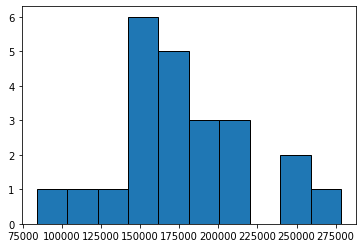

In [31]:
sos['duration_ms'].hist(grid=False, edgecolor='black')

In [56]:
page = requests.get('https://www.amazon.com/s?k=top+books+2022+best+seller+for+women&sprefix=top+book%2Caps%2C244&ref=nb_sb_ss_ts-doa-p_1_8')
html = BeautifulSoup(page.text, 'html.parser')
print(html.get_text())








Sorry! Something went wrong!

  html, body {
    padding: 0;
    margin: 0
  }

  img {
    border: 0
  }

  #a {
    background: #232f3e;
    padding: 11px 11px 11px 192px
  }

  #b {
    position: absolute;
    left: 22px;
    top: 12px
  }

  #c {
    position: relative;
    max-width: 800px;
    padding: 0 40px 0 0
  }

  #e, #f {
    height: 35px;
    border: 0;
    font-size: 1em
  }

  #e {
    width: 100%;
    margin: 0;
    padding: 0 10px;
    border-radius: 4px 0 0 4px
  }

  #f {
    cursor: pointer;
    background: #febd69;
    font-weight: bold;
    border-radius: 0 4px 4px 0;
    -webkit-appearance: none;
    position: absolute;
    top: 0;
    right: 0;
    padding: 0 12px
  }

  @media (max-width: 500px) {
    #a {
      padding: 55px 10px 10px
    }

    #b {
      left: 6px
    }
  }

  #g {
    text-align: center;
    margin: 30px 0
  }

  #g img {
    max-width: 90%
  }

  #d {
    display: none
  }

  #d[src] {
    display: inline
  }
  














docum